##### Task 3.1 Most freq words thru bow

In [84]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

In [85]:
from nltk.corpus import twitter_samples

In [86]:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')
neutral_tweets = twitter_samples.strings('tweets.20150430-223406.json')

In [87]:
all_tweets = pos_tweets + neg_tweets + neutral_tweets

In [88]:
vectorizer = CountVectorizer()

In [89]:
vectorizer.fit_transform(all_tweets)

<30000x35587 sparse matrix of type '<class 'numpy.int64'>'
	with 460818 stored elements in Compressed Sparse Row format>

In [90]:
feature_names = vectorizer.get_feature_names()

In [76]:
def get_top_n_words(tweets, n):
    # transform the preprocessed text data into a matrix of token counts
    bow = vectorizer.transform(tweets)
    # get the total count for each token
    token_count = bow.sum(axis=0)
    # create a dataframe to store the token count for each subset
    df = pd.DataFrame(token_count, columns=feature_names)
    # get the top n words with the highest counts
    top_words = df.transpose().sort_values(by=0, ascending=False)[:n]
    return top_words

In [ ]:
top_positive_words = get_top_n_words(pos_tweets, 10)
top_negative_words = get_top_n_words(neg_tweets, 10)
top_neutral_words = get_top_n_words(neutral_tweets, 10)

In [92]:
print("Top pos words: ",top_positive_words)
print()
print("Top neg words: ",top_negative_words)
print()
print("Top neutral words: ",top_neutral_words)

Top pos words:           0
you   1591
co    1195
to    1093
the   1086
http   856
for    771
and    707
it     680
my     556
in     507

Top neg words:          0
to   1098
the   919
you   803
my    744
and   718
me    699
it    684
so    586
co    566
is    477

Top neutral words:                0
rt        13547
the       12540
to         7663
http       7202
co         6206
miliband   5748
of         5640
snp        5522
in         5447
is         4545


##### Task 3.2 Plotting

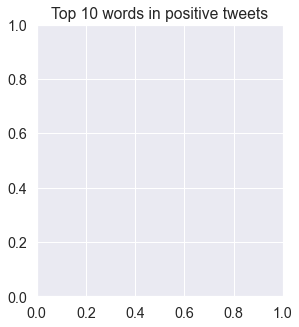

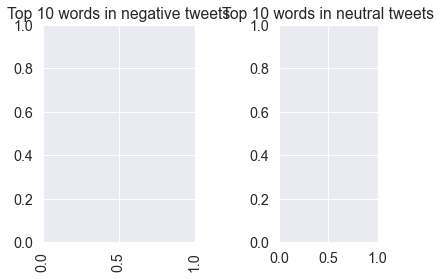

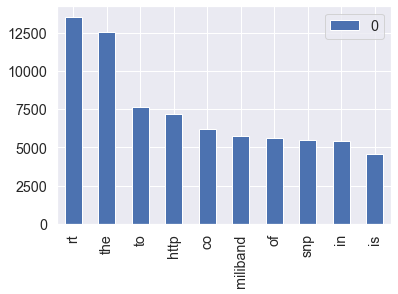

In [93]:
# plot the top 10 words for each subset using a bar chart
plt.figure(figsize=(15,5))
plt.subplot(1,3,3)
plt.title("Top 10 words in positive tweets")
top_positive_words.plot(kind='bar')
plt.xticks(rotation=90)
plt.subplot(1,2,1)
plt.title("Top 10 words in negative tweets")
top_negative_words.plot
plt.xticks(rotation=90)
plt.subplot(1,3,3)
plt.title("Top 10 words in neutral tweets")
top_neutral_words.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()